In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df["target"] = iris.target

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [13]:
df["flower_name"] = df["target"].astype(int).apply(lambda x :iris.target_names[x])

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
flower_mapping = {"setosa":0,"versicolor":1,"virginica":2}


In [20]:
x = df.drop(["target","flower_name"],axis = "columns" )

In [21]:
y = df["target"]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [23]:
len(x_train)

120

In [24]:
len(x_test)

30

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [26]:
model.score(x_test,y_test)

1.0

In [28]:
y_predicted = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [30]:
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

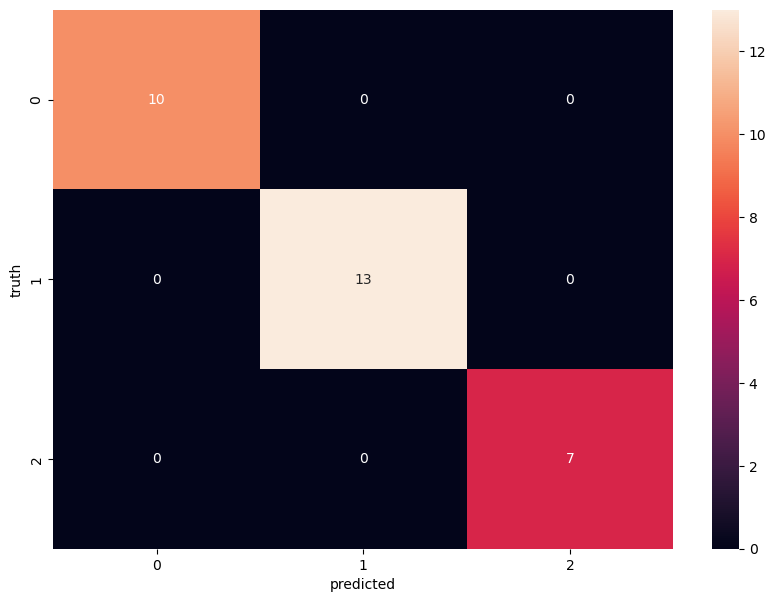

In [31]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")